In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "BananaImages",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 591 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['overripe', 'ripe', 'unripe']

In [5]:
len(dataset)

19

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 2 1 2 2 2 1 1 0 2 0 2 1 2 1 1 0 1 1 0 0 2 2 2 0 1 1 2 2 2 2 1]


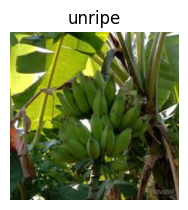

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(1):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        plt.axis("off")

In [8]:
train_size = 0.7
len(dataset)*train_size

13.299999999999999

In [9]:
train_ds = dataset.take(13)
len(train_ds)

13

In [10]:
test_ds = dataset.skip(13)
len(test_ds)

6

In [11]:
val_size = 0.1
len(dataset)*val_size

1.9000000000000001

In [12]:
val_ds=test_ds.take(2)
len(val_ds)

2

In [13]:
test_ds = test_ds.skip(2)
len(test_ds)

4

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size = len(ds)
    global val_size
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_size * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

15

In [17]:
len(val_ds)

1

In [18]:
len(test_ds)

3

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [22]:

input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),

])

In [23]:
model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
15/15 [==============================] - 38s 2s/step - loss: 1.0228 - accuracy: 0.5708 - val_loss: 0.9044 - val_accuracy: 0.5000
Epoch 2/20
15/15 [==============================] - 29s 2s/step - loss: 0.5983 - accuracy: 0.7688 - val_loss: 0.4211 - val_accuracy: 0.8750
Epoch 3/20
15/15 [==============================] - 29s 2s/step - loss: 0.5264 - accuracy: 0.7771 - val_loss: 0.3523 - val_accuracy: 0.8750
Epoch 4/20
15/15 [==============================] - 30s 2s/step - loss: 0.3779 - accuracy: 0.8313 - val_loss: 0.2828 - val_accuracy: 0.8750
Epoch 5/20
15/15 [==============================] - 29s 2s/step - loss: 0.3474 - accuracy: 0.8208 - val_loss: 0.2375 - val_accuracy: 0.9062
Epoch 6/20
15/15 [==============================] - 27s 2s/step - loss: 0.2625 - accuracy: 0.8917 - val_loss: 0.1978 - val_accuracy: 0.9375
Epoch 7/20
15/15 [==============================] - 28s 2s/step - loss: 0.2641 - accuracy: 0.8958 - val_loss: 0.1417 - val_accuracy: 0.9375
Epoch 8/20
15/15 [==

In [27]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 3s 313ms/step - loss: 0.0994 - accuracy: 0.9583


In [28]:
scores

[0.0994342789053917, 0.9583333134651184]

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 15}

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

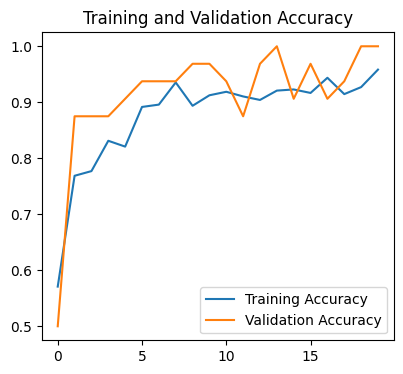

In [33]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



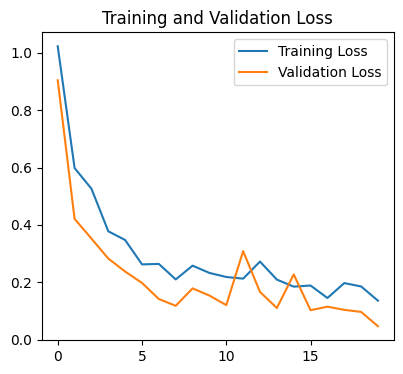

In [34]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: unripe
1/1 [==============================] - 0s 410ms/step
predicted label: ripe
first image to predict
actual label: ripe
1/1 [==============================] - 0s 295ms/step
predicted label: unripe
first image to predict
actual label: ripe
1/1 [==============================] - 0s 322ms/step
predicted label: ripe


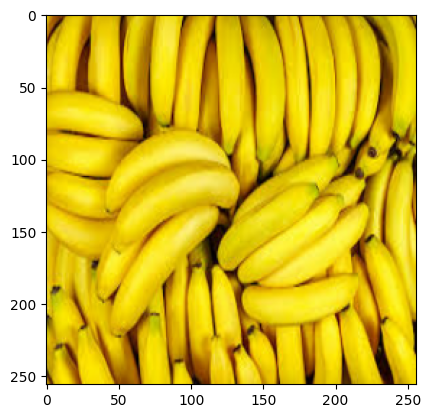

In [35]:
import numpy as np
for images_batch, labels_batch in test_ds.take(3):

    first_image = images_batch[1].numpy().astype('uint8')
    first_label = labels_batch[1].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence


1/1 [==============================] - 0s 27ms/step


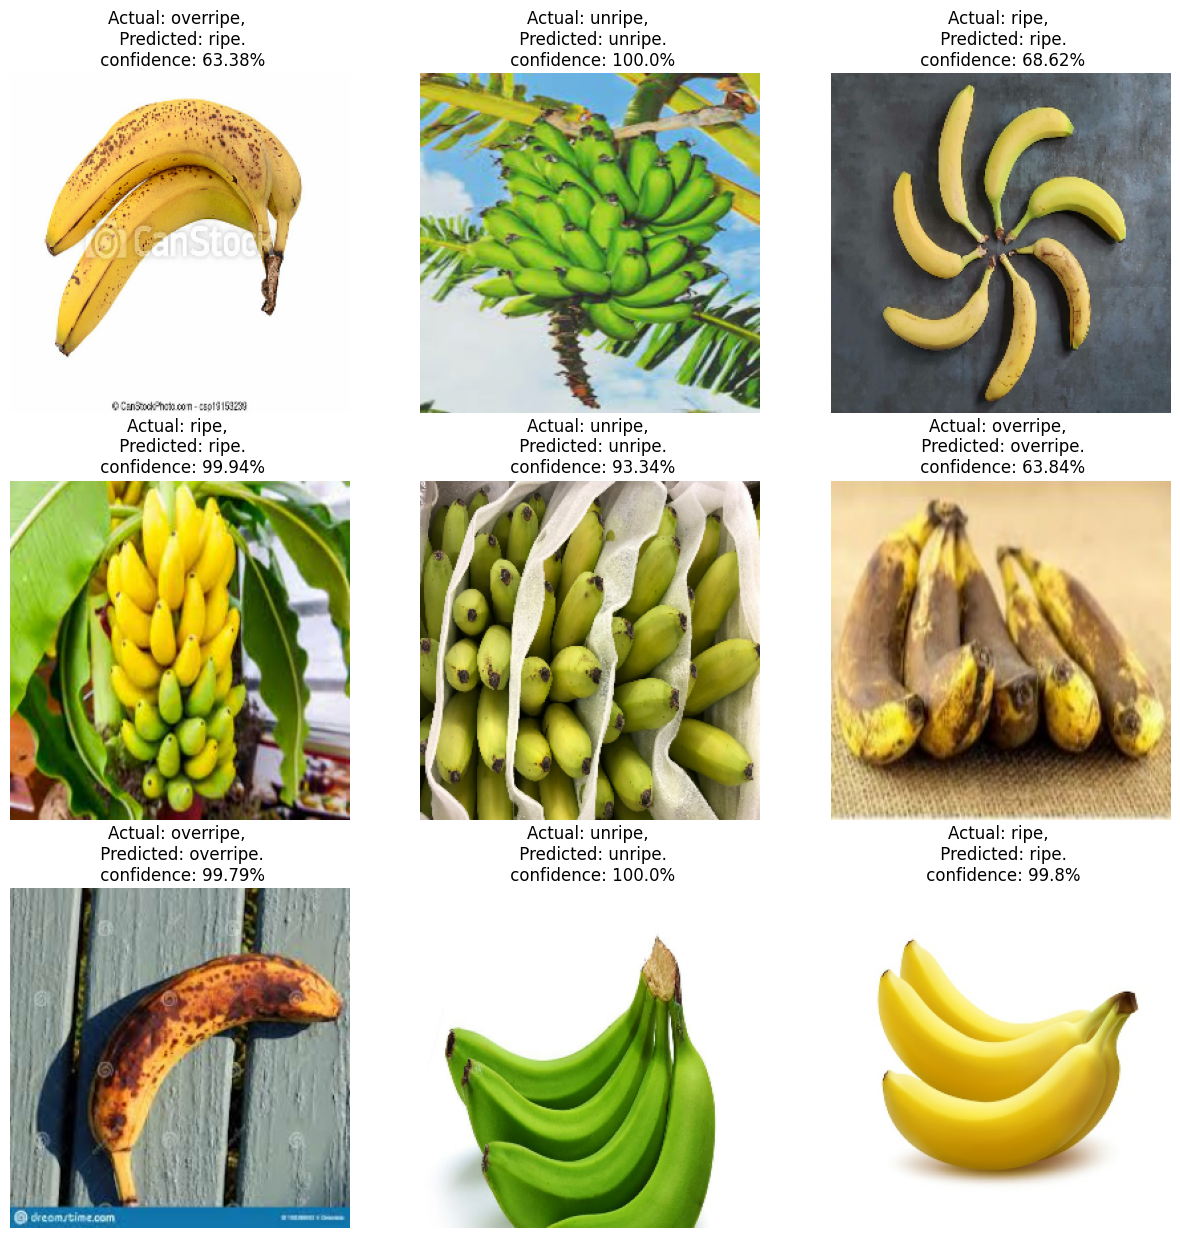

In [37]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(2):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n confidence: {confidence}%")

        plt.axis("off")

In [50]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets
